# Using Random Forest to predict Loan Status

Before we try to predict we first have to understand the data we are working with. **(Exploritory Data Analysis, EDA)**
- What do we suspect is useful info to predict the loan status?
- What data do we exatcly have
- Is the data clean?
- Is the data balanced?

# Import The Data

In [3]:
# Import the data
import pandas as pd
df = pd.read_csv('loan_approval_dataset.csv')

# Gather General Data Stats

In [5]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [6]:
df.shape

(4269, 13)

In [7]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

Here we find something interesting. The columns all have a blank space, lets remove that.

In [9]:
df.columns = df.columns.str.strip()

# Get Unique Values in the Categorical Columns

In [11]:
df.education.unique()

array([' Graduate', ' Not Graduate'], dtype=object)

Again we find blank spaces, lets remove these too

In [13]:
df.education = df.education.str.strip()

In [14]:
df.self_employed.unique()

array([' No', ' Yes'], dtype=object)

In [15]:
# self employed also cotains white spaces
df.self_employed = df.self_employed.str.strip()

In [16]:
df.loan_status.unique()

array([' Approved', ' Rejected'], dtype=object)

In [17]:
# loan_status also cotains white spaces
df.loan_status = df.loan_status.str.strip()

In [18]:
df.describe()
# CIBIL score average is almost 600, AVG loan term is 10.9

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [19]:
# Check for missing data
df.isnull().sum()

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [20]:
# Check for duplicate data
df.duplicated().sum()

0

In [21]:
# How balanced is our data, do we have a 50-50 between approved and rejected loans?
df.loan_status.value_counts(normalize=True)
# No! 62 % of the loans in our data set are approved, this is important to keep in mind for the rest of EDA

loan_status
Approved    0.62216
Rejected    0.37784
Name: proportion, dtype: float64

# Finding Correlations

Before we continue with the data I want to think logically about what we expect to see.
- The lower the CIBIL score the lower the chance that your loan gets approved
- The lower your income to loan ratio the lower the chance that your loan gets approved
- The shorter the loan term the higher chance the loan gets approved
- If you are self employed you have a lower chance of getting a loan
- Education likely does not play a role, but still interesting to see if no education means lower chance of getting a loan.

# Starting with the CIBIL Score
It is very likely that the CIBIL score is an important determinator for the loan status

In [23]:
# Group the loans by loan_status. I expect the CIBIL score mean to be lower for rejected loans
df.groupby('loan_status')['cibil_score'].mean()
# The mean is 270 points lower for rejcted loans, as expected.

loan_status
Approved    703.461973
Rejected    429.468072
Name: cibil_score, dtype: float64

<Axes: xlabel='loan_status', ylabel='cibil_score'>

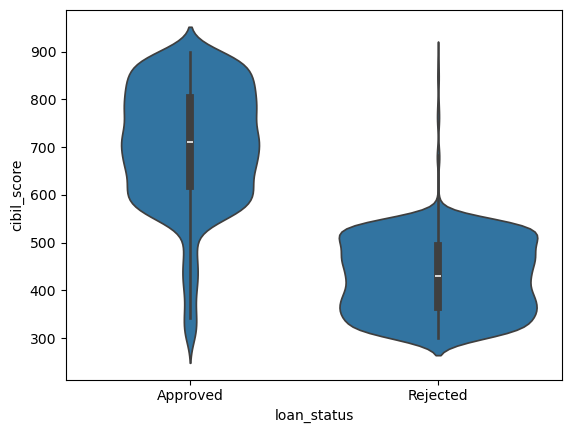

In [24]:
# To get a better view of the CIBIL scores lets plot them using a violin plot
import seaborn as sns
import matplotlib.pyplot as plt
sns.violinplot(x='loan_status', y='cibil_score', data=df)

Almost all rejected loans have a CIBIL score below 600, while almost all Approved loans have one above 600. So there is a specific cutoff value, let's try to find it out.

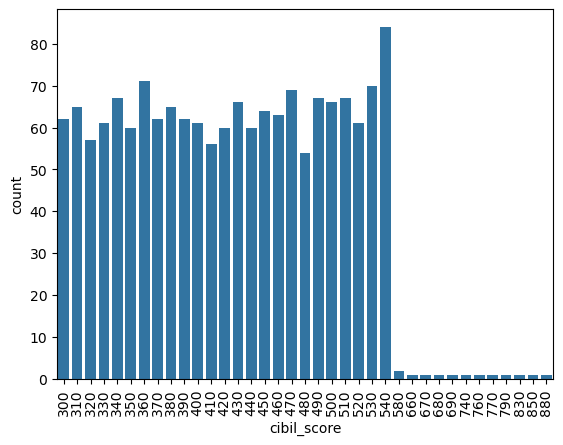

In [26]:
# Generate a frequency plot for loans that are rejected. On the x-axis should be the CIBIL score in buckets of 10 points
sns.countplot(x=df[df['loan_status'] == 'Rejected']['cibil_score'].apply(lambda x: x // 10 * 10))
plt.xticks(rotation=90)
plt.show()

There seems to be a clear cutoff in the 540-550 range, so 550 is most likely the cutoff. We can say, the CIBIL score will likely be a very important feature that the ML model will use to predict the loan_status
# Loan to Income Ratio
I suspect that if you try to take out a relative big loan compared to your income you are less likely to be accepted, but is this truly the case? Lets find out!

<Axes: xlabel='loan_amount', ylabel='income_annum'>

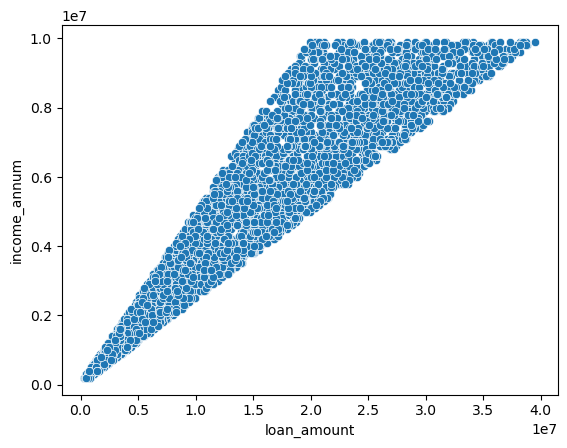

In [28]:
# Plot he loan to income correlation
sns.scatterplot(y='income_annum', x='loan_amount', data=df)

As the loan amount increases the income increases aswell, that is a logical requirement. But, does the ratio itself greatly influence the acceptance rate of a loan, or does it perhaps not matter, since, if you applied for the loan you already are in a specific ratio.

Perhaps the loan with a relative higher income (close to the upper border ot the triangle) is more likely to be accepted.

<Axes: xlabel='loan_amount', ylabel='income_annum'>

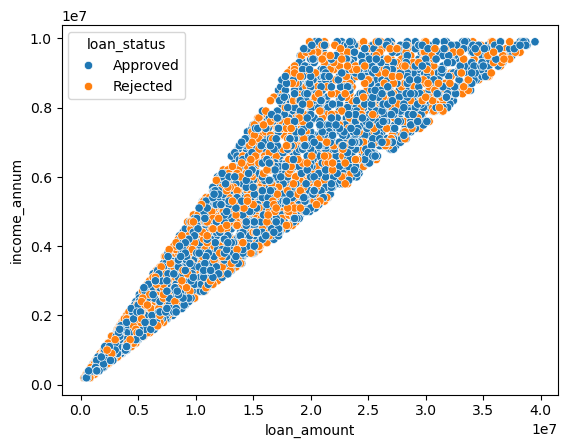

In [30]:
# To see if this is the case I will give each dot a color based on the loan status.
# We expect the upper and lower sides to have their own colors, or atleast be mainly one color.
sns.scatterplot(y='income_annum', x='loan_amount', hue='loan_status', data=df)

The colors seem to be evenly spread, so the ratio does not matter.

However, perhaps there are too many dots, lets reduce them by looking at a randomly picked sample of 10% and check again.

Keep in mind, we are expecting to see more blue dots, because our data contains more approved loans (62%).

In [32]:
# Generate a sample (10% of total)
df_sample = df.sample(frac=0.1)

<Axes: xlabel='loan_amount', ylabel='income_annum'>

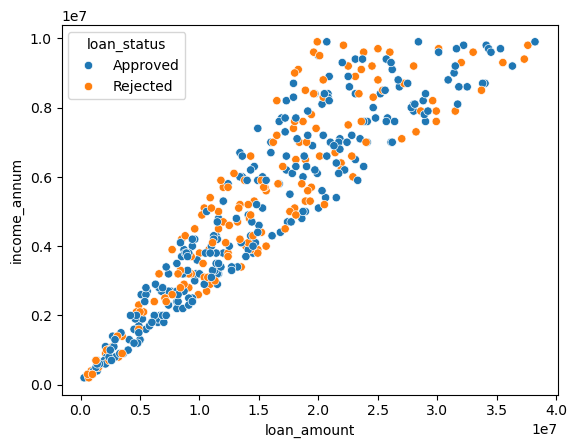

In [33]:
# Plot our sample data
sns.scatterplot(y='income_annum', x='loan_amount', hue='loan_status', data=df_sample)

It still looks pretty even, perhaps there are a few more blue dots in the lower part, which is something we should expect, but there is no way to tell for sure.

So, we can for now say that income to loan ratio does not matter that much. You can have a low ratio and still be rejected, or a very high ratio and still be approved.

# Does Loan Term play a role?

Perhaps the requirements for shorter term loans are less strict compared to longer term loans.

<Axes: xlabel='loan_term', ylabel='count'>

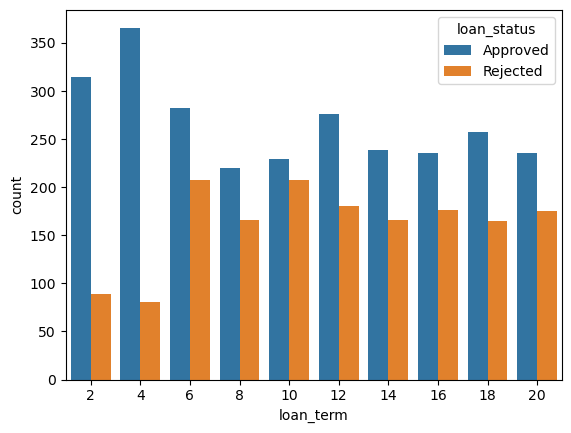

In [36]:
# Plot the loan term and approval rate
sns.countplot(x='loan_term', hue='loan_status', data=df)

At shorter terms, up to 4, the approval rate id substantially higher compared to the longer terms loans, interesting! There again seems to be some kind of cut off.

# Lets look at the outliers

- Look at the loans that are approved with a CIBIL score below 550
- Look at the short term loans that are rejected
- Look at the long term loans that are accepted

In [39]:
# First get the outliers we want to look at
below_550_cibil = df[df['cibil_score'] < 550]
short_term = df[df['loan_term'] < 5]

I am interested in why certain loans where approved with a CIBIL score below 550, so lets look at the income to loan ratio again. Because perhaps you do need a good income to loan ratio to get approved if you have a low CIBIL score.

<Axes: xlabel='loan_amount', ylabel='income_annum'>

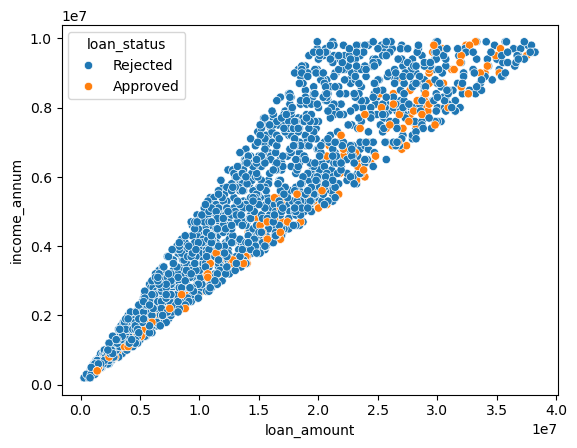

In [41]:
# Income to Loan ratio low CIBIL scores
sns.scatterplot(data=below_550_cibil, x='loan_amount', y='income_annum', hue='loan_status')

This makes absolute zero sense to me! This scatterplot seems to suggest that as your loan amount increases relative to your income you are more likely to be approved....

I would think that as a lender if you were to loan something to someone with a low CIBIL score they at least should have a high income compared to the loan, but apparently the opposite is true.

What if these are shorter term loans? Perhaps only shorter term loans are approved below a certain score.

In [43]:
# What is the average loan term for loans approved with a low score?
below_550_cibil[below_550_cibil.loan_status == 'Approved'].loan_term.mean()

3.1243243243243244

In [44]:
# And what was the average for all approved loans?
df[df.loan_status == 'Approved'].loan_term.mean()

10.397590361445783

Now we are getting somewhere! It seems like the restrictions for shorter term loans are more linient. Lets check if this explains the very strange phenomenom we observed in the scatter plot above.

I will make the same scatterplot, but the dot size will be based on the loan term. If all orange dots are small then that means that all approved loans are short term loans, that would explain it.

<Axes: xlabel='loan_amount', ylabel='income_annum'>

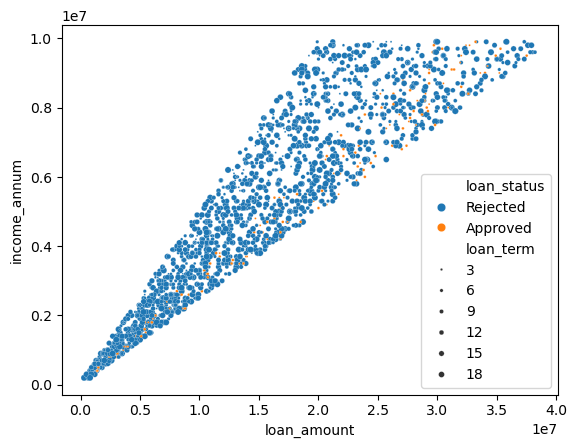

In [46]:
# Same plot, but with loan term determining the dot size
# I used sizes 2 and 20 to make the difference more extreme
sns.scatterplot(data=below_550_cibil, x='loan_amount', y='income_annum', hue='loan_status', size='loan_term', sizes=(2, 20))

Here we go!!! All the orange dots are extremely small and thus have a low loan term!

# So far we know
- The CIBIL score is extremely important, with a cutoff at 550
- The Loan term is extremely important, with a cutoff at 4

<Axes: xlabel='loan_amount', ylabel='income_annum'>

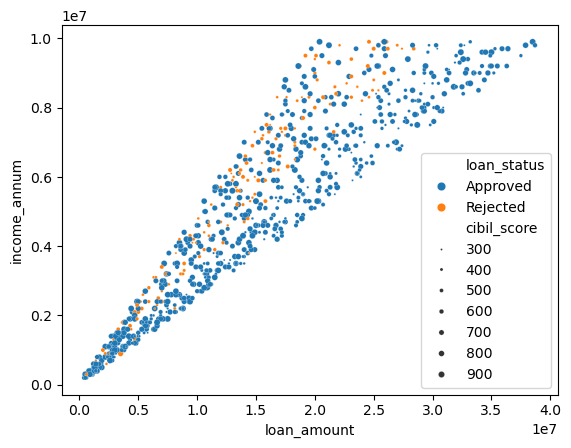

In [49]:
# Scatter plot short term data with CIBIL score for the size
sns.scatterplot(data=short_term, x='loan_amount', y='income_annum', hue='loan_status', size='cibil_score', sizes=(2, 20))

Logical result, of the short term loans most, but not all, with low CIBIL scores (small dots) are rejected

In [51]:
short_term_low_score_appr = short_term[(short_term.loan_status == 'Approved') & (short_term.cibil_score < 550)]
short_term_low_score_rej = short_term[(short_term.loan_status == 'Rejected') & (short_term.cibil_score < 550)]

In [52]:
short_term_low_score_appr.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,185.000000,185.000000,1.850000e+02,1.850000e+02,185.000000,185.000000,1.850000e+02,1.850000e+02,1.850000e+02,1.850000e+02
mean,2160.821622,2.578378,4.940000e+06,1.724000e+07,3.124324,421.540541,7.666486e+06,5.192432e+06,1.490865e+07,4.832973e+06
std,1227.608246,1.714886,2.917846e+06,1.025985e+07,0.994934,74.175173,6.477533e+06,4.771444e+06,9.500025e+06,3.340666e+06
min,11.000000,0.000000,2.000000e+05,6.000000e+05,2.000000,300.000000,0.000000e+00,0.000000e+00,7.000000e+05,1.000000e+05
25%,1131.000000,1.000000,2.300000e+06,8.100000e+06,2.000000,355.000000,2.500000e+06,1.400000e+06,6.300000e+06,2.200000e+06
50%,2143.000000,3.000000,5.100000e+06,1.700000e+07,4.000000,426.000000,5.900000e+06,3.300000e+06,1.490000e+07,4.400000e+06
75%,3295.000000,4.000000,7.500000e+06,2.630000e+07,4.000000,483.000000,1.170000e+07,8.400000e+06,2.160000e+07,6.800000e+06
max,4246.000000,5.000000,9.900000e+06,3.750000e+07,4.000000,549.000000,2.630000e+07,1.900000e+07,3.810000e+07,1.400000e+07


In [53]:
short_term_low_score_rej.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,168.000000,168.000000,1.680000e+02,1.680000e+02,168.000000,168.000000,1.680000e+02,1.680000e+02,1.680000e+02,1.680000e+02
mean,2175.863095,2.779762,5.383333e+06,1.328690e+07,2.940476,426.761905,7.722024e+06,5.153571e+06,1.590179e+07,5.267857e+06
std,1161.317293,1.724864,2.827573e+06,7.216046e+06,1.001211,71.590589,6.575234e+06,4.525601e+06,8.877958e+06,3.371123e+06
min,73.000000,0.000000,3.000000e+05,5.000000e+05,2.000000,301.000000,0.000000e+00,0.000000e+00,7.000000e+05,1.000000e+05
25%,1075.000000,1.000000,3.100000e+06,7.300000e+06,2.000000,363.500000,2.200000e+06,1.275000e+06,9.125000e+06,2.700000e+06
50%,2143.500000,3.000000,5.700000e+06,1.380000e+07,2.000000,418.000000,6.100000e+06,4.050000e+06,1.530000e+07,4.750000e+06
75%,3127.500000,4.000000,7.800000e+06,1.830000e+07,4.000000,491.250000,1.145000e+07,8.125000e+06,2.262500e+07,7.225000e+06
max,4257.000000,5.000000,9.900000e+06,2.840000e+07,4.000000,547.000000,2.620000e+07,1.880000e+07,3.720000e+07,1.460000e+07


- No of dependents is the same for approved and rejected.
- Mean income is higher and mean income is lower for rejected (CRAZY!)
- Cibil score same, so not like all appr are just under 550, while all rej are at like 300
- All values are on average higher for the rejected low score loans. Also WEIRD

<Axes: xlabel='loan_term', ylabel='count'>

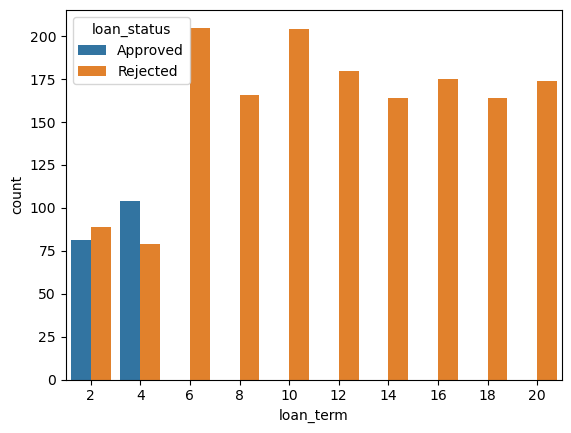

In [55]:
# This plot again shows us perfectly that with a low CIBIL score you can only get approved for short term loans
sns.countplot(x='loan_term', hue='loan_status', data=below_550_cibil)

# It is time to call in the help from the machine!
I know the CIBIL score and Loan Term are determinants of loan approval. However, I cannot explain all loans. For example, I cannot explain why certain loans with a low CIBIL score where and low loan term were rejected while others were approved.

Lets see if ML can predict if a loan will be approved or denied.

For my first ever ML model I will go with a Random Forest Classifier.
Why? Because a nural net (ChatGPT) told me it works particulary well with data that has cut offs in it, like we have.

So what is the plan?
- Make all data numerical
- Split the data into a test set and train set
- Train the model
- Interpretate the results

# Making all data numerical
All we have to do is turn Education into 0 and 1, instead of graduate and not graduate, and do the same for loan_status and self_employed

In [57]:
from sklearn.preprocessing import LabelEncoder

df['loan_status'] = df['loan_status'].map({'Rejected': 0, 'Approved': 1}) # Ensuring Rejected is 0
df['education'] = LabelEncoder().fit_transform(df['education'])
df['self_employed'] = LabelEncoder().fit_transform(df['self_employed'])

# Capital X is contains features, and y is the thing you are trying to predict

In [59]:
X = df.drop(columns=['loan_id', 'loan_status'])
y = df['loan_status']

# Split the data

In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
# Stratify ensure that the ratio of approved loans is the same in both the test and train set

# Init the Model

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

rf = RandomForestClassifier(
    n_estimators=200,        # number of trees
    max_depth=None,          # let trees expand fully
    random_state=42,
    class_weight="balanced"  # handle imbalance like before
)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:,1]

In [64]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nAUC:", roc_auc_score(y_test, y_proba))


Accuracy: 0.9800936768149883

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       323
           1       0.98      0.99      0.98       531

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854


Confusion Matrix:
 [[313  10]
 [  7 524]]

AUC: 0.9989446864086103


I have to be honest, making a ML that predict something with 98% sounds like it should be hard, but this was insanely easy!

Looking at the confusion matrix we only missed 13 Rejected and 7 approved loans!

It correctly identified 99% of all approved loans.

And it correctly identified 97% of all rejected loans.

I would call this a big success!

# Which features mattered?

In [66]:
features = pd.DataFrame(rf.feature_importances_, index=X_train.columns, columns=['importance'])
print(features.sort_values('importance', ascending=False))

                          importance
cibil_score                 0.825565
loan_term                   0.050555
loan_amount                 0.029745
income_annum                0.017145
luxury_assets_value         0.016994
residential_assets_value    0.016855
commercial_assets_value     0.016682
bank_asset_value            0.014272
no_of_dependents            0.007774
self_employed               0.002256
education                   0.002157


Like we expected, the CIBIL score was the most important, with the loan term being the second most important feature.

# What is next, How can we improve it? Hyper parameter tuning!

Apperently you can use Randomized Search CV to find the best parameters for your model, so let's test it out!

In [68]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [200, 500, 1000],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

rf_tuned = RandomizedSearchCV(
    RandomForestClassifier(random_state=42, class_weight="balanced"),
    param_grid, n_iter=20, cv=5, scoring='roc_auc', n_jobs=-1
)
rf_tuned.fit(X_train, y_train)
print("Best params:", rf_tuned.best_params_)
print("Best CV AUC:", rf_tuned.best_score_)


Best params: {'n_estimators': 1000, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10}
Best CV AUC: 0.9973096215230278


# Input the the suggested parameters

In [70]:
rf_optimized = RandomForestClassifier(
    n_estimators=500,       # more trees = smoother, more stable predictions
    max_depth=30,            # prevents trees from overfitting all the way
    min_samples_split=2,
    min_samples_leaf=2,      # regularization: no leaf smaller than 2
    max_features='log2',     # adds diversity, reduces overfitting
    random_state=42,
    class_weight="balanced"
)

rf_optimized.fit(X_train, y_train)
y_pred = rf_optimized.predict(X_test)
y_proba = rf_optimized.predict_proba(X_test)[:, 1]


In [71]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nAUC:", roc_auc_score(y_test, y_proba))

Accuracy: 0.9824355971896955

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       323
           1       0.98      0.99      0.99       531

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854


Confusion Matrix:
 [[315   8]
 [  7 524]]

AUC: 0.9988513990193162


# The accuracy did improve!

Somehow the accuracy did improve, even tho it was already at 98%.

Admittidly the improvement is not that big, only .2%, but still, 2 more approved loans were recalled:)

I am not sure if further improvements are possible, but I am happy with an accuracy of over 98%, so that concludes this Notebook.

Good Luck Everyone!